In [29]:
import pandas as pd
import sqlite3
import regex as re
import plotly.express as px

df = pd.read_excel('club_data_set.xlsx')
df.set_index('序号', inplace=True)
df = df.iloc[:, :5]
df.rename(columns={'学生社团名称':'ClubName', '类     型':'Type', '负责同学':'Principal', '学     院':'College', '业务指导老师':'Advisor'}, inplace=True)
df['ClubName'] = df['ClubName'].str.replace('华南农业大学', '')
df

,ClubName,Type,Principal,College,Advisor
序号,,,,,
1,青廉社,思想政治类,庄燕丽,动物科学学院,李治权
2,新禾融媒体工作室,其他类,石宇坤,公共管理学院,费思迎
3,校史文化宣讲团,文化体育类,许嘉熙,人文与法学学院,陈源
4,国旗护卫队,自律互助类,杨哲,食品学院,张东彦
5,学工融媒体中心,其他类,曹婧,经济管理学院,周志荣
...,...,...,...,...,...
98,人工智能协会,学术科技类,麦彦恒,电子工程学院（人工智\n能学院）,邓小玲
99,法律实践教学中心,其他类,黄斯斯,人文与法学学院,钟继军
100,中文实践教学中心,其他类,杨丹,人文与法学学院,傅修海


In [30]:
club_type_count = df.groupby('Type')[['Type']].count()
club_type_count.rename(columns={'Type':'Count'}, inplace=True)
club_type_count

,Count
Type,
其他类,19
创新创业类,2
学术科技类,11
志愿公益类,2
思想政治类,3
文化体育类,55
自律互助类,10


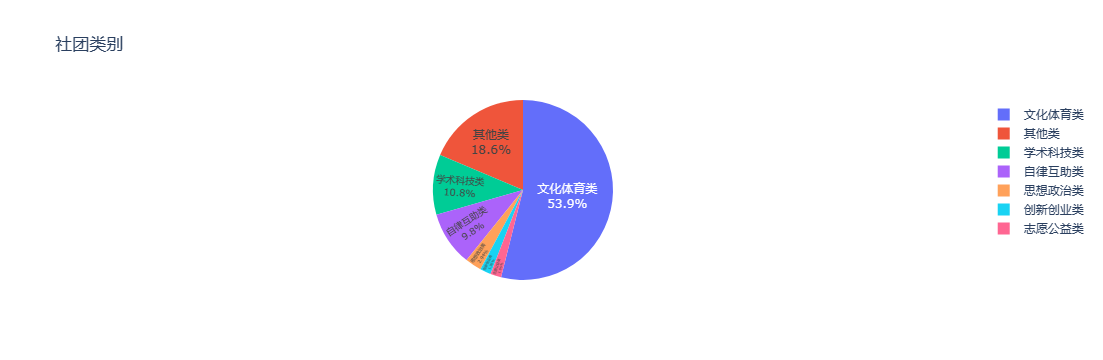

In [31]:
fig = px.pie(club_type_count, values='Count', names=club_type_count.index, title='社团类别')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [32]:
df['ClubName'].values

array(['青廉社', '新禾融媒体工作室', '校史文化宣讲团', '国旗护卫队', '学工融媒体中心', '学生社区自我管理委员会',
       '新长城自强社', '大学生勤工助学服务队', '心理健康辅导中心阳光团队', '学生职业规划园', '学生科技创新与创业联合会',
       '青年学“习”社', '研究生科学技术协会', '模型协会', '青苹果话剧社', '轮滑协会', '天文爱好者协会',
       '大学生创业协会', '创益青年', '创造与成功协会', '璃羽漫画协会', '跆拳道协会', '劲抽粤文化协会', '书画社',
       '吉他协会', '紫荆口琴社', '摄影协会', '推理协会', '音乐爱好者协会', '南蓁汉服协会', '益智游戏协会',
       'beatbox协会', '公共关系协会', '龙狮团', 'SCSC滑板协会', '乒乓球协会', 'Air极限飞盘协会',
       '手球协会', '台球协会', '橄榄球协会', '羽毛球协会', '篮球协会', '定向越野协会', '武术协会', '排球协会',
       '毽球协会', '足球协会', '网球协会', 'aoe英语口语协会', '韩国语言与文化交流协会', '若木日语学社',
       '法治研究会', '菁菁诗社', '绿窗文学社', '义务工作者协会', '雄鹰锣鼓队协会', '魔术爱好者协会',
       '演讲与口才协会', '茶文化协会', '花卉艺术协会', '植物分类协会', '植物观赏协会', '旅游协会',
       '小动物爱护协会', '葡萄酒文化协会', '环保科技协会', '军事爱好者协会', '无人机协会', '昆虫爱好者协会',
       '棋牌协会', '水族协会', '青年时政论坛社', '学生艺术团', '学生合唱团', '管乐团', '研究生艺术团',
       '模拟政协', '学生教学信息委员会', '膳食管理委员会', '紫荆读者俱乐部', '校友服务中心', '紫荆华农马协会',
       '椇橼学社', '百花园', '茶艺团', '花艺团', '境泉学社', '青年森林经理学社', '方程式赛车队', '机器人协会',
       '建筑

In [65]:
import pandas as pd
import random
import sqlite3

connection = sqlite3.connect("latest.db")

# Create cursor
cursor = connection.cursor()
sql = "SELECT * FROM CBDB_NAME_LIST"
cursor.execute(sql)
result = cursor.fetchall()
names = []
for row in result:
    names.append(row[1])

columns = ["Name", "Club", "Contact", "Role", "Grade", "Major", "Class", "FeeToPay"]

df2 = pd.DataFrame(columns=columns)

clubs = ['青廉社', '新禾融媒体工作室', '校史文化宣讲团', '国旗护卫队', '学工融媒体中心', '学生社区自我管理委员会',
       '新长城自强社', '大学生勤工助学服务队', '心理健康辅导中心阳光团队', '学生职业规划园', '学生科技创新与创业联合会',
       '青年学“习”社', '研究生科学技术协会', '模型协会', '青苹果话剧社', '轮滑协会', '天文爱好者协会',
       '大学生创业协会', '创益青年', '创造与成功协会', '璃羽漫画协会', '跆拳道协会', '劲抽粤文化协会', '书画社',
       '吉他协会', '紫荆口琴社', '摄影协会', '推理协会', '音乐爱好者协会', '南蓁汉服协会', '益智游戏协会',
       'beatbox协会', '公共关系协会', '龙狮团', 'SCSC滑板协会', '乒乓球协会', 'Air极限飞盘协会',
       '手球协会', '台球协会', '橄榄球协会', '羽毛球协会', '篮球协会', '定向越野协会', '武术协会', '排球协会',
       '毽球协会', '足球协会', '网球协会', 'aoe英语口语协会', '韩国语言与文化交流协会', '若木日语学社',
       '法治研究会', '菁菁诗社', '绿窗文学社', '义务工作者协会', '雄鹰锣鼓队协会', '魔术爱好者协会',
       '演讲与口才协会', '茶文化协会', '花卉艺术协会', '植物分类协会', '植物观赏协会', '旅游协会',
       '小动物爱护协会', '葡萄酒文化协会', '环保科技协会', '军事爱好者协会', '无人机协会', '昆虫爱好者协会',
       '棋牌协会', '水族协会', '青年时政论坛社', '学生艺术团', '学生合唱团', '管乐团', '研究生艺术团',
       '模拟政协', '学生教学信息委员会', '膳食管理委员会', '紫荆读者俱乐部', '校友服务中心', '紫荆华农马协会',
       '椇橼学社', '百花园', '茶艺团', '花艺团', '境泉学社', '青年森林经理学社', '方程式赛车队', '机器人协会',
       '建筑学社', '结构设计工作室', '计算机维护队', 'ERP研究社', '英语辩论队', '光电信息协会', '单片机协会',
       '人工智能协会', '法律实践教学中心', '中文实践教学中心', '匹克球协会', '太极拳协会']

roles = ["社长", "社员", "管理员"]

grades = [2023, 2022, 2021, 2020]

players = pd.read_excel('FM24高潜小牛名单.xlsx')
players = players.iloc[:100]['中文名'].tolist()
players += names

majors = ["计算机科学", "经济学", "英语", "数学", "物理", "化学", "生物", "地理", "历史", "哲学", "政治学",
          "法学", "教育学", "文学", "历史学", "考古学", "新闻学", "传播学", "艺术学", "音乐学", "体育学",
          "医学", "药学", "护理学", "口腔医学", "公共卫生学", "管理学", "工商管理", "会计学", "金融学",
          "市场营销", "人力资源管理", "国际贸易", "物流管理", "信息管理", "旅游管理", "酒店管理", "房地产管理"]

for i in range(1000):
    df2.loc[i] = [
        players[i],
        random.choice(clubs),
        random.randint(13000000000, 13999999999),
        random.choice(roles),
        random.choice(grades),
        random.choice(majors),
        random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9]),
        0,]
df2

,Name,Club,Contact,Role,Grade,Major,Class,FeeToPay
0,朱德·贝林汉姆,小动物爱护协会,13318020310,管理员,2022,哲学,2,0
1,布卡约·萨卡,beatbox协会,13965363594,社长,2021,工商管理,9,0
2,拉明·亚马尔,校友服务中心,13576676237,管理员,2021,护理学,4,0
3,莫伊塞斯·凯塞多,心理健康辅导中心阳光团队,13225260608,社长,2023,生物,9,0
4,贾马尔·穆西亚拉,若木日语学社,13921729472,社长,2022,市场营销,9,0
...,...,...,...,...,...,...,...,...
995,寇瑊,吉他协会,13649108696,社员,2022,英语,3,0
996,寇準,方程式赛车队,13799432314,社长,2020,酒店管理,3,0
997,寇平,模拟政协,13916949483,管理员,2022,工商管理,8,0
998,孔憲,光电信息协会,13516638828,管理员,2021,金融学,4,0


In [67]:
import sqlite3

connection = sqlite3.connect("clubs_and_members.db")
cursor = connection.cursor()

sql = """
    INSERT INTO Members (Name, Club, Contact, Role, Grade, Major, Class, FeeToPay)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
"""

for row in df2.values:
    cursor.execute(sql, row)

connection.commit()

In [55]:
connection = sqlite3.connect("latest.db")

# Create cursor
cursor = connection.cursor()
sql = "SELECT * FROM CBDB_NAME_LIST"
cursor.execute(sql)
result = cursor.fetchall()
name = []
for row in result:
    name.append(row[1])
players + name

['朱德·贝林汉姆',
 '布卡约·萨卡',
 '拉明·亚马尔',
 '莫伊塞斯·凯塞多',
 '贾马尔·穆西亚拉',
 '爱德华多·卡马温加',
 '乔什科·瓜尔迪奥尔',
 '努诺·门德斯',
 '佩德里',
 '迈克·摩尔',
 '埃斯特瓦奥',
 '恩德里克',
 '沃伦·扎伊尔-埃默里',
 '埃文·弗格森',
 '维托尔·罗克',
 '尤素福·穆库科',
 '加维',
 '亚历杜罗·巴尔德',
 '耶雷米·皮诺',
 '安苏·法蒂',
 '尼科·威廉姆斯',
 '乔治奥·斯卡尔维尼',
 '列维·科尔维尔',
 '瑞安·格拉文贝尔奇',
 '杰雷米·多库',
 '里科·刘易斯',
 '阿纳托利·特鲁宾',
 '皮耶罗·因卡皮',
 '迈克尔·奥利塞',
 '帕佩·马塔尔·萨尔',
 '伊桑·努瓦内里',
 '罗德里戈·莫拉',
 '诺亚·达维奇',
 '谢·莱西',
 '斯韦雷·哈尔塞斯·尼潘',
 '肯德里·帕耶斯',
 '洛兰',
 '路易斯·吉尔赫尔梅',
 '阿桑·韦德拉奥戈',
 '阿奇·格雷',
 '朱尼奥尔·克鲁皮',
 '西蒙·帕富迪',
 '沙奎尔·范佩西',
 '伊万·弗雷斯内达',
 '本·多克',
 '乌斯曼·迪奥曼德',
 '朱利安·杜兰维尔',
 '保罗·瓦纳',
 '若奥·韦洛索',
 '若奥·雷戈',
 '德西雷·杜埃',
 '乔雷尔·哈托',
 '埃利塞·本·塞吉尔',
 '马蒂斯·特尔',
 '罗德里戈·里贝罗',
 '巴德雷丁·布瓦纳尼',
 '吉约姆·雷斯特斯',
 '克劳迪奥·埃切韦里',
 '斯特凡·巴杰蒂奇',
 '阿尔达·古勒',
 '奥斯卡·格鲁赫',
 '安杰洛',
 '亚瑟·阿斯皮利亚',
 '亚历杭德罗·加纳乔',
 '塞缪尔·伊灵',
 '哈维·格雷拉',
 '瓦伦丁·巴尔科',
 '若奥·内维斯',
 '迈克尔·卡约德',
 '穆罕默德-阿里·乔',
 '亚历克斯·斯科特',
 '弗洛里安·维尔茨',
 '拉扎尔·萨马尔季奇',
 '安东尼奥·席尔瓦',
 '萨维·西蒙斯',
 '本杰明·舍斯科',
 '艾伦·希基',
 '雷扬·切尔基',
 '托马索·巴尔达扎尼',
 '切萨雷·卡萨代',
 '诺尼·马杜埃克',
 '蒂诺·利夫拉门托',
 '拉斯穆斯·霍伊隆德',
 '马科斯·莱昂纳多',


In [5]:
import random
import sqlite3

# 连接到数据库
conn = sqlite3.connect('clubs_and_members.db')

# 创建游标
cursor = conn.cursor()

# 生成1000个随机username
usernames = []
for i in range(1000):
    username = 'user' + str(random.randint(1, 1000))
    usernames.append(username)

# 插入数据
for username in usernames:
    # 检查数据库中是否存在相同的username
    cursor.execute('SELECT COUNT(*) FROM Login WHERE Username = ?', (username,))
    count = cursor.fetchone()[0]

    # 如果存在相同的username，则重新生成一个随机username
    if count > 0:
        while True:
            username = 'user' + str(random.randint(1, 1000))
            if username not in usernames:
                break

    # 插入数据
    cursor.execute('INSERT INTO Login (Username, Password) VALUES (?, ?)', (username, 'pass' + username))

# 提交事务
conn.commit()

# 关闭连接
conn.close()
